# Question 1 
A Data Programming professor has a class of students. Frustrated with their lack of discipline, he
decides to cancel class if fewer than some number of students are present when class starts.
Arrival times go from on time (𝑎𝑟𝑟𝑖𝑣𝑎𝑙𝑇𝑖𝑚𝑒 ≤ 0) to arrived late (𝑎𝑟𝑟𝑖𝑣𝑎𝑙𝑇𝑖𝑚𝑒 > 0).
Given the arrival time of each student and a threshold number of attendees, determine if the class
is canceled.
Input Format
The first line of input contains t, the number of test cases.
Each test case consists of two lines.
The first line has two space-separated integers, n and k, the number of students (size of a) and
the cancellation threshold.
The second line contains n space-separated integers (𝑎[1], 𝑎[2], … 𝑎[𝑛]) describing the arrival
times for each student.
Note: Non-positive arrival times (𝑎[𝑖] ≤ 0)) indicate the student arrived early or on time;
positive arrival times (𝑎[𝑖] > 0) indicate the student arrived minutes late.
For example, there are n = 6 students who arrive at times 𝑎 = [−1, −1,0,0,1,1]. Four are there
on time, and two arrive late. If there must be k = 4 for class to go on, in this case the class will
continue. If there must be k = 5, then class is cancelled.

In [ ]:
#Question1 Code is attached in Same repository. Below is the output

Q1.jpeg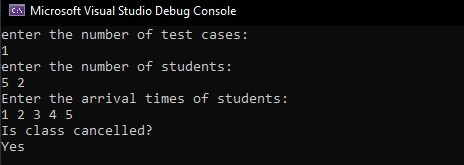


# Question 2
You will be given two arrays of integers and asked to determine all integers that satisfy the
following two conditions:
1. The elements of the first array are all factors of the integer being considered
2. The integer being considered is a factor of all elements of the second array
These numbers are referred to as being between the two arrays. You must determine how many
such numbers exist.
For example, given the arrays 𝑎 = [𝟐, 𝟔] and 𝑏 = [𝟐𝟒, 𝟑𝟔] , there are two numbers between
them: 6 and 12. 6%12 = 0, 6%6 = 0 and 36%6 = 0 for the first value. Similarly, 12%2 = 0
and 24%12 = 0, 36%0 = 0.
Function Description
Complete the getTotalX function in the editor below. It should return the number of integers that
are betwen the sets.
getTotalX has the following parameter(s):
• a: an array of integers
• b: an array of integers

In [ ]:
#To be Executed on Visual Studio. Zipped file is attached in the same repository

using System;
using System.Collections.Generic;

namespace DataProgQ2
{
    class Program
    {
        static void Main(string[] args)
        {
            Program program = new Program();
            int[] arrLen = { }, a = { }, b = { };
            int aLen, bLen, total;
            try
            {
                //Console.WriteLine("Enter array length");
                arrLen = program.ParseAndValidateLine(Console.ReadLine(), 2).ToArray();
                aLen = arrLen[0];
                bLen = arrLen[1];
                program.validateArrayLength(aLen, bLen);

                //Console.WriteLine("Enter array 'a': ");
                a = program.ParseAndValidateLine(Console.ReadLine(), aLen).ToArray();
                //Console.WriteLine("Enter array 'b': ");
                b = program.ParseAndValidateLine(Console.ReadLine(), bLen).ToArray();

                total = program.getTotalX(a, b);
                Console.WriteLine(total);
            }
            catch (Exception e)
            {
                Console.WriteLine(e.Message);
            }

        }



        private int getTotalX(int[] a, int[] b)
        {
            int startIdx, endIdx, num;
            List<int> aLst = new List<int>(a);
            List<int> bLst = new List<int>(b);
            List<int> numList = new List<int>();
            aLst.Sort();
            bLst.Sort();
            startIdx = aLst[aLst.Count - 1];
            endIdx = bLst[0];
            for (num = startIdx; num <= endIdx; num++)
            {
                numList.Add(num);
            }
            numList = findNumMatchingA(numList, aLst);
            numList = findNumMatchingB(numList, bLst);

            return numList.Count;
        }

        private List<int> findNumMatchingA(List<int> numList, List<int> aLst)
        {
            List<int> newNumLst = new List<int>();
            foreach (int num in numList)
            {
                if (HasAllFactors(num, aLst))
                {
                    newNumLst.Add(num);
                }
            }
            return newNumLst;
        }

        private List<int> findNumMatchingB(List<int> numList, List<int> bLst)
        {
            List<int> newNumLst = new List<int>();
            foreach (int num in numList)
            {
                if (IsFactorOf(bLst, num))
                {
                    newNumLst.Add(num);
                }
            }
            return newNumLst;
        }

        private bool IsFactorOf(List<int> bLst, int num)
        {
            List<int> factorLst = new List<int>();
            foreach (int bItem in bLst)
            {
                factorLst = getFactors(bItem);
                if (!factorLst.Contains(num))
                {
                    return false;
                }
            }
            return true;
        }

        private List<int> getFactors(int num)
        {
            List<int> factorLst = new List<int>();
            for (int idx = 1; idx <= num; idx++)
            {
                if (num % idx == 0)
                {
                    factorLst.Add(idx);
                }
            }
            return factorLst;
        }

        private bool HasAllFactors(int num, List<int> aLst)
        {
            List<int> factorLst = getFactors(num);

            foreach (int item in aLst)
            {
                if (!factorLst.Contains(item))
                {
                    return false;
                }
            }
            return true;
        }

        private void validateArrayLength(int aLen, int bLen)
        {
            if (aLen < 1 || aLen > 10)
            {
                throw new ArrayLengthException();
            }
            if (bLen < 1 || bLen > 10)
            {
                throw new ArrayLengthException();
            }
        }
        private List<int> ParseAndValidateLine(string line, int excepted)
        {
            List<int> arrLst = ParseLine(line);
            if (arrLst.Count != excepted)
            {
                throw new InputLengthException(excepted, arrLst.Count);
            }
            return arrLst;
        }
        private List<int> ParseLine(string line)
        {
            int outputVal = 0;
            bool isNumber = false;
            List<int> outputList = new List<int>();
            string[] words = line.Split(" ");
            foreach (string word in words)
            {
                isNumber = int.TryParse(word, out outputVal);
                if (!isNumber)
                {
                    throw new InvalidDataException(line);
                }
                else if (outputVal < 1 || outputVal > 100)
                {
                    throw new InvalidValueException();
                }
                else
                {
                    outputList.Add(outputVal);
                }
            }
            return outputList;
        }
    }

    public class ArrayLengthException : Exception
    {
        public ArrayLengthException() :
            base("Array length should be between 1 and 10")
        {

        }
    }

    public class InvalidValueException : Exception
    {
        public InvalidValueException() :
            base("Value should be between 1 and 100")
        {

        }
    }

    public class InputLengthException : Exception
    {
        public InputLengthException(int excepted, int actual) :
            base($"Excepted input {excepted}, Actual input {actual}")
        {

        }
    }

    public class InvalidDataException : Exception
    {
        public InvalidDataException(string data) :
            base($"Invalid data: {data}")
        {

        }
    }
}

Q2.jpeg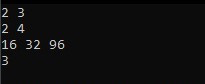

# Question 3

Housing

Step 1. Import the necessary libraries

In [2]:
#Step 1
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joining the Series by column

In [3]:
#Step 2

Series1 = pd.Series(np.random.randint(1,5, 100))
Series2 = pd.Series(np.random.randint(1,4, 100))
Series3 = pd.Series(np.random.randint(10000,30001, 100))


#Step 3
df_house = pd.concat([no1, no2, no3], axis=1)
df_house.head()

,0,1,2
0,2,2,21760
1,4,3,26203
2,1,2,14178
3,4,2,26497
4,2,1,15418


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [6]:
#Step 4
df_house.columns = [ "bedrs","bathrs","price_sqr_meter"]
df_house.head()


,bedrs,bathrs,price_sqr_meter
0,2,2,21760
1,4,3,26203
2,1,2,14178
3,4,2,26497
4,2,1,15418


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'

In [7]:
#Step 5
df_bigcolumn = df_house['bedrs'].append(df_house['bathrs'].append(df_house['price_sqr_meter']))
df_bigcolumn

0         2
1         4
2         1
3         4
4         2
      ...  
95    28764
96    23420
97    19525
98    20145
99    22500
Length: 300, dtype: int64

Step 6. Ops it seems it is going only until index 99. Is it true?

In [8]:
#Step 6
df_house.tail()

,bedrs,bathrs,price_sqr_meter
95,4,2,28764
96,4,1,23420
97,1,2,19525
98,3,1,20145
99,1,2,22500


Step 7. Reindex the DataFrame so it goes from 0 to 299

In [9]:
#Step 7
#joining the 3 series
df_house = pd.concat([Series1, Series2, Series3], axis=0, ignore_index=True)
#checking the first 5 values using head
df_house.head()
df_bigcolumn.reset_index()

,index,0
0,0,2
1,1,4
2,2,1
3,3,4
4,4,2
...,...,...
295,95,28764
296,96,23420
297,97,19525
298,98,20145


# Question 4

Wind Statistics

The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

In [12]:
#Step 1
import pandas as pd
import numpy as np

#Step 2
wind_dataset = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
wind_dataset.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [13]:
#Step 3 Creating Apply function for dataframe
def month_day(val):
    if val < 10:
        return(str(0)+str(val))
    else:
        return(str(val))

#manipulating the first three columns into a date column
wind_dataset["date"] = wind_dataset[["Yr", "Mo", "Dy"]].apply(lambda x: str(x["Yr"])+"-"+month_day(x["Mo"])+"-"+month_day(x["Dy"]), axis=1 )
wind_dataset["date"] = pd.to_datetime(wind_dataset["date"], format="%y-%m-%d")
wind_dataset.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [14]:
wind_dataset["date"] = wind_dataset[["Yr", "Mo", "Dy"]].apply(lambda x: "19"+str(x["Yr"])+"-"+month_day(x["Mo"])+"-"+month_day(x["Dy"]), axis=1 )
wind_dataset["date"] = pd.to_datetime(wind_dataset["date"])
wind_dataset.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [15]:
#dropping the extra columns from the dataframe
wind_dataset.drop(["Yr", "Mo", "Dy"], axis=1, inplace=True)

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [16]:
#converting the index
wind_dataset.set_index("date", inplace=True)
wind_dataset.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [17]:
# finding the missing values column wise
wind_dataset.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [18]:
# finding the missing values Row Wise
wind_dataset[wind_dataset.isnull().any(axis=1)]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN
1961-03-12,NaN,13.88,16.38,10.25,14.92,13.67,17.12,13.70,16.29,15.79,20.50,22.54


Step 7. Compute how many non-missing values there are in total.

In [19]:
print(wind_dataset.info())
#displaying values
print(wind_dataset.notnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB
None
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times

A single number for the entire dataset.

In [20]:
print(wind_dataset.mean(axis=1).mean(axis=0))

10.228284167350386


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

A different set of numbers for each location.

In [21]:
#Creating the loc_stats dataframe
loc_stats = pd.DataFrame()
#adding the values from wind dataset
loc_stats["min"] = wind_dataset.min(axis=0)
loc_stats["max"] = wind_dataset.max(axis=0)
loc_stats["mean"] = wind_dataset.mean(axis=0)
loc_stats["std"] = wind_dataset.std(axis=0)

#checking the first 5 rows
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

A different set of numbers for each day

In [22]:
#creating a new dataframe
day_stats = pd.DataFrame()
day_stats["min"] = wind_data.min(axis=1)
day_stats["max"] = wind_data.max(axis=1)
day_stats["mean"] = wind_data.mean(axis=1)
day_stats["std"] = wind_data.std(axis=1)
day_stats.head()

,min,max,mean,std
0,1.0,61.0,14.728571,14.220976
1,1.0,61.0,13.478571,14.406022
2,1.0,61.0,13.790000,14.398500
3,1.0,61.0,9.695333,14.555991
4,1.0,61.0,12.970667,13.745564


Step 11. Find the average windspeed in January for each location.

Treat January 1961 and January 1962 both as January.

In [25]:
wind_dataset = wind_dataset.reset_index() 
Jan_dataset = wind_dataset[wind_dataset['date'].dt.month == 1]
#Finding the average windspeed
Jan_dataset = Jan_dataset.mean(axis = 0)
Jan_dataset

level_0    3119.277778
index      3119.277778
RPT          14.847325
VAL          12.914560
ROS          13.299624
KIL           7.199498
SHA          11.667734
BIR           8.054839
DUB          11.819355
CLA           9.512047
MUL           9.543208
CLO          10.053566
BEL          14.550520
MAL          18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [26]:
#grouping the dataframe by years
wind_dataset.groupby(wind_dataset['date'].dt.year).sum()

,level_0,index,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,,,
1961,66430,66430,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962,199655,199655,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963,332880,332880,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,467565,467565,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,599695,599695,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,732920,732920,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,866145,866145,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,1002291,1002291,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,1132960,1132960,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


Step 13. Downsample the record to a monthly frequency for each location.

In [27]:
#Creating Month frequency dataframe
mnth_freq = wind_dataset
mnth_freq.groupby([mnth_freq['date'].dt.year.rename('year'),mnth_freq['date'].dt.month.rename('month')]).sum()

level_0   index     RPT     VAL     ROS     KIL     SHA     BIR  \
year month                                                                    
1961 1          465     465  445.24  359.65  416.38  239.84  321.11  266.23   
     2         1246    1246  455.54  419.31  389.92  249.23  387.86  306.25   
     3         2294    2294  326.70  350.19  333.34  218.52  325.79  274.87   
     4         3135    3135  321.68  282.83  299.94  174.92  253.05  194.85   
     5         4185    4185  305.69  265.50  335.36  177.16  294.20  203.82   
...             ...     ...     ...     ...     ...     ...     ...     ...   
1978 8       199516  199516  299.00  256.04  280.00  139.59  228.41  183.99   
     9       193995  193995  327.41  326.85  319.05  171.75  311.16  278.35   
     10      201407  201407  306.83  268.80  288.17  146.36  264.28  210.00   
     11      195825  195825  484.55  444.08  405.24  219.52  344.25  262.29   
     12      203298  203298  501.44  426.19  484.69  219.94  353.36  286.49   

               DUB     CLA     MUL     CLO     BEL     MAL  
year month                                                  
1961 1      346.73  277.36  281.66  313.33  430.31  455.80  
     2      332.94  331.69  331.00  356.00  520.33  431.53  
     3      298.97  304.72  298.53  348.81  508.74  471.60  
     4      207.76  212.84  220.27  217.11  334.42  308.35  
     5      228.12  253.49  249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...     ...     ...  
1978 8      175.16  167.95  224.48  171.64  324.47  373.68  
     9      323.71  287.49  302.08  268.17  470.41  581.74  
     10     251.58  227.47  257.23  255.56  427.08  531.65  
     11     344.77  289.72  321.04  320.28  522.14  621.69  
     12     374.40  316.04  329.12  341.89  429.65  662.52  

[216 rows x 14 columns]

Step 14. Downsample the record to a weekly frequency for each location.

In [28]:
week_freq = wind_dataset
#creating week frequency df
week_freq.groupby([week_freq['date'].dt.year.rename('year'),week_freq['date'].dt.month.rename('month'), 
                   week_freq['date'].dt.week.rename('week')]).sum()



level_0  index     RPT     VAL     ROS    KIL     SHA  \
year month week                                                          
1961 1     1          28     28   94.79   68.92   73.41  44.92   66.32   
           2          77     77   87.28   62.77   83.71  32.41   51.46   
           3         126    126   92.43   69.04   90.88  44.30   53.80   
           4         175    175  119.28  112.99  127.58  89.04  122.03   
           5          59     59   36.42   30.97   27.63  19.88   27.50   
...                  ...    ...     ...     ...     ...    ...     ...   
1978 12    48      19632  19632   56.20   50.34   56.08  29.50   44.17   
           49      45843  45843  145.18  134.33  119.24  68.44  107.01   
           50      45892  45892  117.31  102.85  104.91  48.42   79.78   
           51      45941  45941   78.09   56.06   92.21  28.03   54.78   
           52      45990  45990  104.66   82.61  112.25  45.55   67.62   

                    BIR     DUB     CLA     MUL     CLO     BEL     MAL  
year month week                                                          
1961 1     1      45.05   77.43   39.70   59.04   59.48   87.37   92.67  
           2      35.51   52.75   47.74   39.99   53.00   77.88   77.17  
           3      51.92   64.80   55.13   50.02   56.87   68.75   80.04  
           4     103.80  108.70  106.12  101.36  109.48  146.51  157.71  
           5      20.08   29.38   18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...     ...     ...  
1978 12    48     41.79   51.33   38.84   41.71   46.54   48.76   71.40  
           49     89.42  101.06   87.42   97.09   98.58  129.62  161.43  
           50     50.91   71.46   55.77   64.18   59.96   77.72  108.94  
           51     44.03   54.59   60.67   50.06   56.51   82.92  132.84  
           52     60.34   95.96   73.34   76.08   80.30   90.63  187.91  

[1124 rows x 14 columns]

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [29]:
data = week_freq.groupby([week_freq['date'].dt.year.rename('Year'),week_freq['date'].dt.week.rename('Week')]).sum()
#for calculation of mean, min, max and std 
cal_mean = pd.Series(data.head(52).mean(axis=1))
cal_min = pd.Series(data.head(52).min(axis=1))
cal_max = pd.Series(data.head(52).max(axis=1))
cal_std = pd.Series(data.head(52).std(axis=1))
#creating a dataframe with above values
stats = pd.DataFrame({'Min':cal_min, 'Max':cal_max, 'Mean':cal_mean, 'Std Deviation':cal_std})
#O/P the values
stats

Min      Max        Mean  Std Deviation
Year Week                                           
1961 1     28.00    94.79   61.792857      22.355729
     2     32.41    87.28   61.119286      18.759960
     3     44.30   126.00   73.570000      26.610448
     4     89.04   175.00  125.328571      27.579221
     5     57.73   224.00  102.802143      54.435566
     6     75.42   273.00  134.349286      62.138488
     7     60.50   322.00  127.640714      85.011178
     8     59.67   371.00  128.625714     103.806542
     9     54.84   420.00  128.072143     124.813531
     10    48.17   469.00  130.005714     144.767141
     11    49.59   518.00  144.537857     159.658645
     12    46.54   567.00  143.777143     180.390089
     13    43.80   616.00  148.340714     198.578431
     14    41.71   665.00  151.474286     218.108024
     15    34.63   714.00  143.073571     242.156990
     16    54.38   763.00  169.880000     251.577169
     17    33.61   812.00  160.670000     276.202937
     18    69.67   861.00  201.984286     279.564855
     19    37.07   910.00  177.786429     310.365589
     20    29.81   959.00  181.419286     329.790424
     21    22.49  1008.00  186.800000     348.264960
     22    44.17  1057.00  206.467857     360.605924
     23    36.50  1106.00  208.754286     380.375418
     24    45.64  1155.00  226.042857     393.938553
     25    38.35  1204.00  232.399286     412.242121
     26    45.55  1253.00  234.575000     431.692141
     27    50.54  1302.00  248.631429     446.553366
     28    58.89  1351.00  262.997143     461.219894
     29    19.01  1400.00  232.105714     494.914079
     30    40.09  1449.00  263.586429     502.425821
     31    43.67  1498.00  270.680714     520.140947
     32    35.55  1547.00  268.960000     541.582764
     33    60.20  1596.00  302.822857     548.049741
     34    49.76  1645.00  307.370714     566.955744
     35    39.50  1694.00  292.624286     593.890628
     36    39.80  1743.00  298.120714     612.254439
     37    73.10  1792.00  343.065000     614.170669
     38    29.11  1841.00  305.078571     650.842378
     39    58.59  1890.00  339.815000     656.999752
     40    36.84  1939.00  325.205000     683.839230
     41    46.05  1988.00  342.191429     697.472790
     42    75.05  2037.00  383.877857     700.725045
     43    56.61  2086.00  373.457857     725.843076
     44    52.79  2135.00  374.677143     746.071371
     45    29.54  2184.00  356.923571     774.227441
     46    31.51  2233.00  364.882143     791.772680
     47    34.79  2282.00  377.668571     806.924114
     48    43.72  2331.00  391.528571     821.862291
     49    60.37  2380.00  418.872143     831.060536
     50    60.88  2429.00  423.218571     849.876581
     51    38.62  2478.00  409.894286     876.410612
     52    47.48  2527.00  428.602857     889.313457

# Question 5

Step 1. Import the necessary libraries
Step 2: Import Dataset from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
Step 3. Assign it to a variable called chipo.

In [30]:
import pandas as pd
import numpy as np
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

Step 5. What is the number of observations in the dataset?

In [31]:
print(len(chipo.index))

4622


Step 6. What is the number of columns in the dataset?

In [32]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [33]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [34]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [35]:
print("most ordered:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

most ordered: Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?

In [36]:
print("Number of Orders:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "item_name"])

Number of Orders: 726


Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [37]:
#Step 11
print("most ordered:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

#Step 12
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

#Step 13
chipo["item_price"].dtypes

most ordered: [Diet Coke]


dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [38]:
#creating a new column revenue and summing it later to get total
chipo["revenue"] = chipo["quantity"] * chipo["item_price"]
print("Total Revenue: ", chipo["revenue"].sum())

Total Revenue:  39237.02


Step 15. How many orders were made in the period?

In [39]:
print("Total Orders: ", len(chipo["order_id"].unique()))

Total Orders:  1834


Step 16. What is the average revenue amount per order?

In [40]:
#group by order id to get average revenue
chipo.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

Step 17. How many different items are sold?

In [41]:
print("Total unique items: ", len(chipo["item_name"].unique()))

Total unique items:  50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Don't forget to label your axes!

In [49]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv(r"us-marriages-divorces-1867-2014.csv") 
#reading the local file which is on desktop
df.shape 
#getting the no of rows and columns

(145, 6)

In [46]:
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


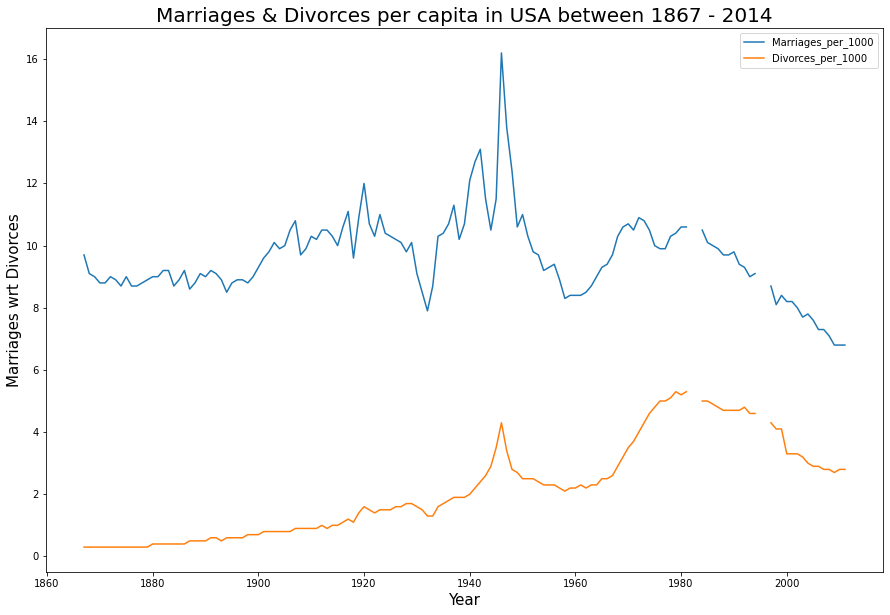

In [50]:
#plotting the graph
df.plot.line(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], figsize=(15,10)) 
#giving labels for x axis
plt.xlabel('Year', fontsize = 15) 
#giving labels for y axis
plt.ylabel('Marriages wrt Divorces', fontsize = 15) 
#assigning a title
plt.title("Marriages & Divorces per capita in USA between 1867 - 2014", fontsize=20) 
plt.legend()
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#creating another dataframe from specific years
df2 = df[(df_us_marriage.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]
#dropping the unnecessary columns
df3 = df2.drop(columns = ['Marriages', 'Divorces', 'Population'])
#chaging the index 
df4 = df3.set_index('Year')
df4

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


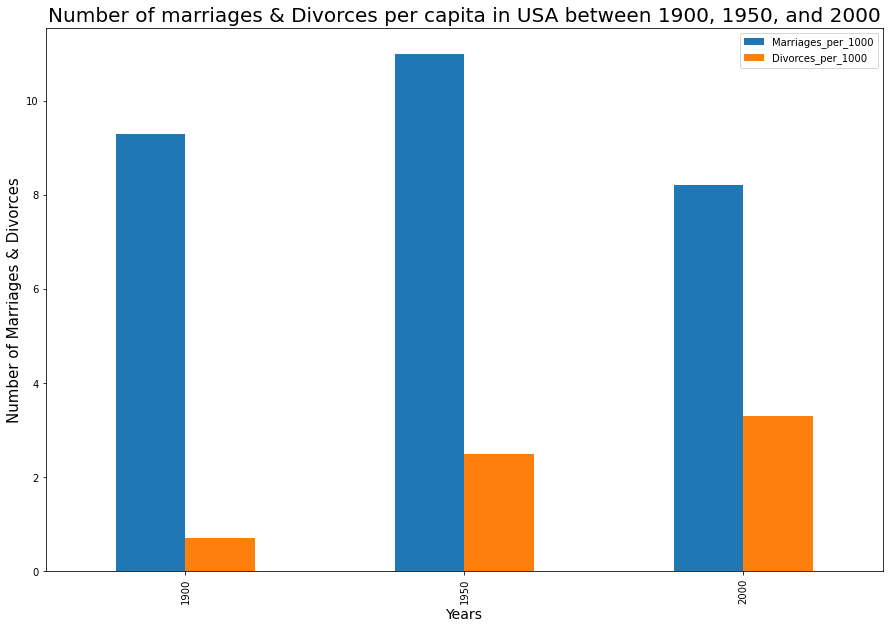

In [52]:
#plotting graph

df4.plot.bar(figsize=(15,10)) 
#giving labels for x axis
plt.xlabel('Years', fontsize = 14) 
#giving labels for y axis
plt.ylabel('Number of Marriages & Divorces', fontsize = 15) 
#title label
plt.title("Number of marriages & Divorces per capita in USA between 1900, 1950, and 2000", fontsize=20)

plt.legend() 
#For plotting the legend
plt.show() 

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

Don't forget to label your axes!

In [53]:
#reading data from csv file 
deadliest_actors = pd.read_csv(r'actor_kill_counts.csv')

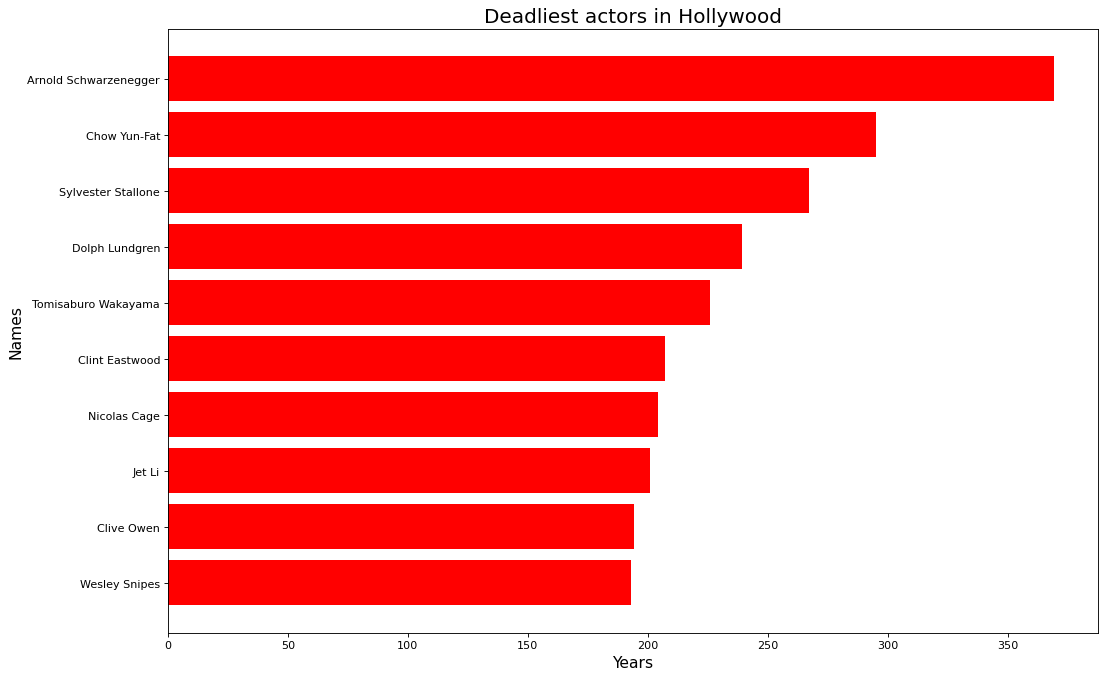

In [57]:
#sorting
actors = deadliest_actors.sort_values(by="Count") 

#plotting
plt.figure(figsize=(15,10), dpi= 80) 

#specifying a horizontal bar graph
plt.barh(actors['Actor'], actors['Count'],  color='red') 
#giving labels for x axis
plt.xlabel('Years', fontsize = 14) 
#giving labels for y axis
plt.ylabel('Names', fontsize = 14) 

plt.title("Deadliest actors in Hollywood", fontsize=18) 
plt.show() 

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.


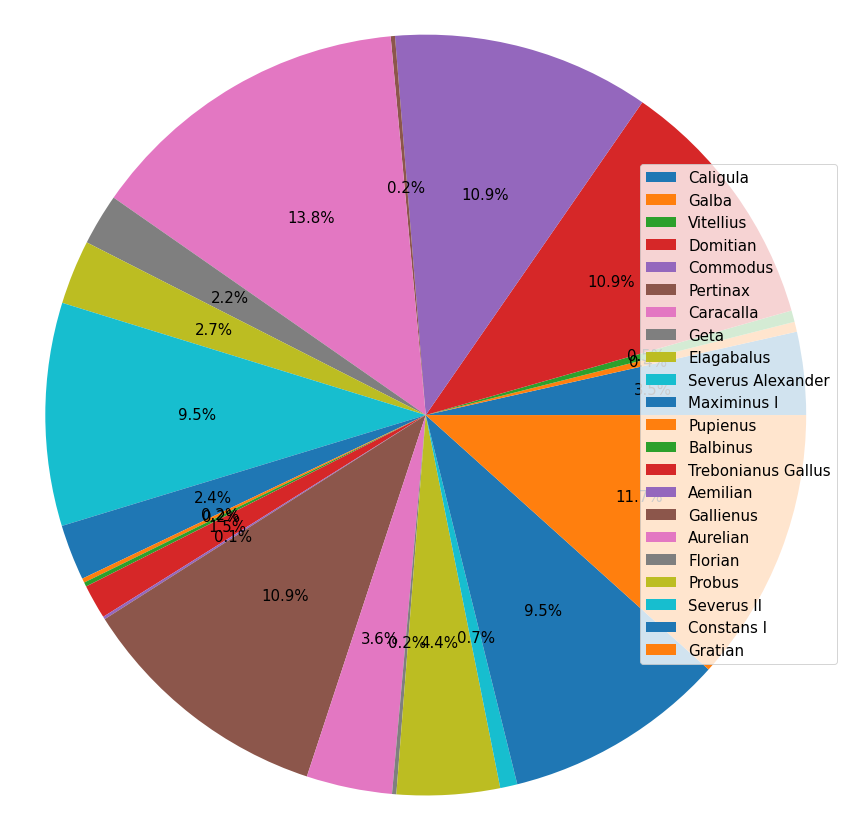

In [59]:
emperors = pd.read_csv(r'roman-emperor-reigns.csv') #reading the csv file

#filtering
assass_emperors = emperors[emperors.Cause_of_Death == 'Assassinated']
labels = assass_emperors.Emperor 
sizes = assass_emperors.Length_of_Reign

#plotting
fig, ax = plt.subplots(figsize=(15,15))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 15})
plt.axis('equal')
plt.legend( labels, loc="right", fontsize = 15)
plt.show()

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.

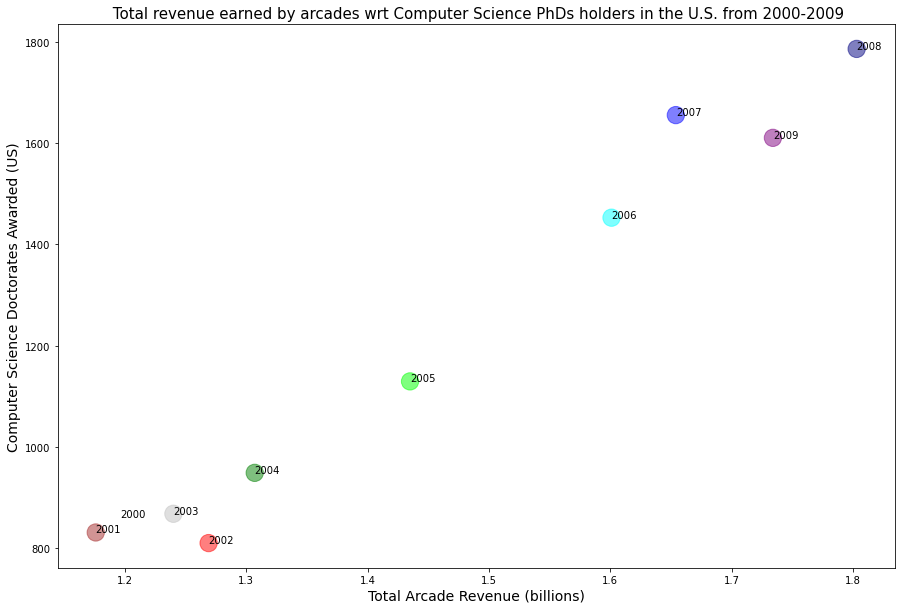

In [62]:
import seaborn as sb

#fetching data from csv file
m = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')

#adding the x axis values
x = m["Total Arcade Revenue (billions)"]
#defining the y axis values
y = m["Computer Science Doctorates Awarded (US)"]

#scatter value is years differentiated with colors
year = m.Year
colours = ['white','brown','red','silver','green','lime','aqua','blue','navy','purple']

#defining the fig size
fig, ax = plt.subplots(figsize=(15,10))
#plotting a scatter plot using a for loop
scatter = plt.scatter(x, y, alpha=0.5, label=year, c = colours, s =300)
for i, txt in enumerate(year):
    ax.annotate(txt, (x[i], y[i]))
#defining the lables of x & y 
plt.xlabel('Total Arcade Revenue (billions)', fontsize = 14)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize = 14)

#title of the plot
plt.title(' Total revenue earned by arcades wrt Computer Science PhDs holders in the U.S. from 2000-2009', fontsize = 15)

plt.show() 

Thank You. This is the end.